In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc  

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import graphviz 
from sklearn.tree import export_graphviz 
from mlxtend.plotting import plot_decision_regions 

In [2]:
df = pd.read_csv('./creditcard-fraud.csv')

In [3]:
df.head(5)

merchan_id  avg_amount_days  transaction_amount is_declined  \
0  3870243310       771.509596        21602.268700          no   
1  4948629322       865.320280        38074.092320          no   
2  4225126900        86.352272         2935.977252          no   
3  5634640261       539.971341        29158.452440          no   
4  6257110788       533.949394        13348.734850          no   

   number_declines_days foreign_transaction high_risk_countries  \
0                     0                  no                  no   
1                     0                  no                  no   
2                     0                  no                  no   
3                     6                  no                  no   
4                     3                  no                  no   

   daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq    is_fradulent  
0                 998            998.0             5  non-fraudulent  
1                 996            996.0             6      fraudulent  
2                 993            992.0             7      fraudulent  
3                 991            989.0             4      fraudulent  
4                 998            981.0             5  non-fraudulent

In [4]:
df['is_fradulent'].value_counts()

non-fraudulent    2627
fraudulent         448
Name: is_fradulent, dtype: int64

In [5]:
df.describe()

merchan_id  avg_amount_days  transaction_amount  \
count  3.075000e+03      3075.000000         3075.000000   
mean   5.026634e+09       515.026556         9876.399210   
std    9.870778e+08       291.906978        10135.331016   
min    3.160041e+09         4.011527            0.000000   
25%    4.170814e+09       269.788047         2408.781147   
50%    5.025578e+09       502.549575         6698.891856   
75%    5.889625e+09       765.272803        14422.568935   
max    6.665906e+09      2000.000000       108000.000000   

       number_declines_days  daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq  
count           3075.000000         3075.000000      3075.000000   3075.000000  
mean               0.957398           55.737561        40.022407      0.391870  
std                2.192391          206.634779       155.968840      1.548479  
min                0.000000            0.000000         0.000000      0.000000  
25%                0.000000            0.000000         0.000000      0.000000  
50%                0.000000            0.000000         0.000000      0.000000  
75%                0.000000            0.000000         0.000000      0.000000  
max               20.000000          998.000000       998.000000      9.000000

In [6]:
df.isnull().sum()

merchan_id              0
avg_amount_days         0
transaction_amount      0
is_declined             0
number_declines_days    0
foreign_transaction     0
high_risk_countries     0
daily_chbk_avg_amt      0
6m_avg_chbk_amt         0
6m_chbk_freq            0
is_fradulent            0
dtype: int64

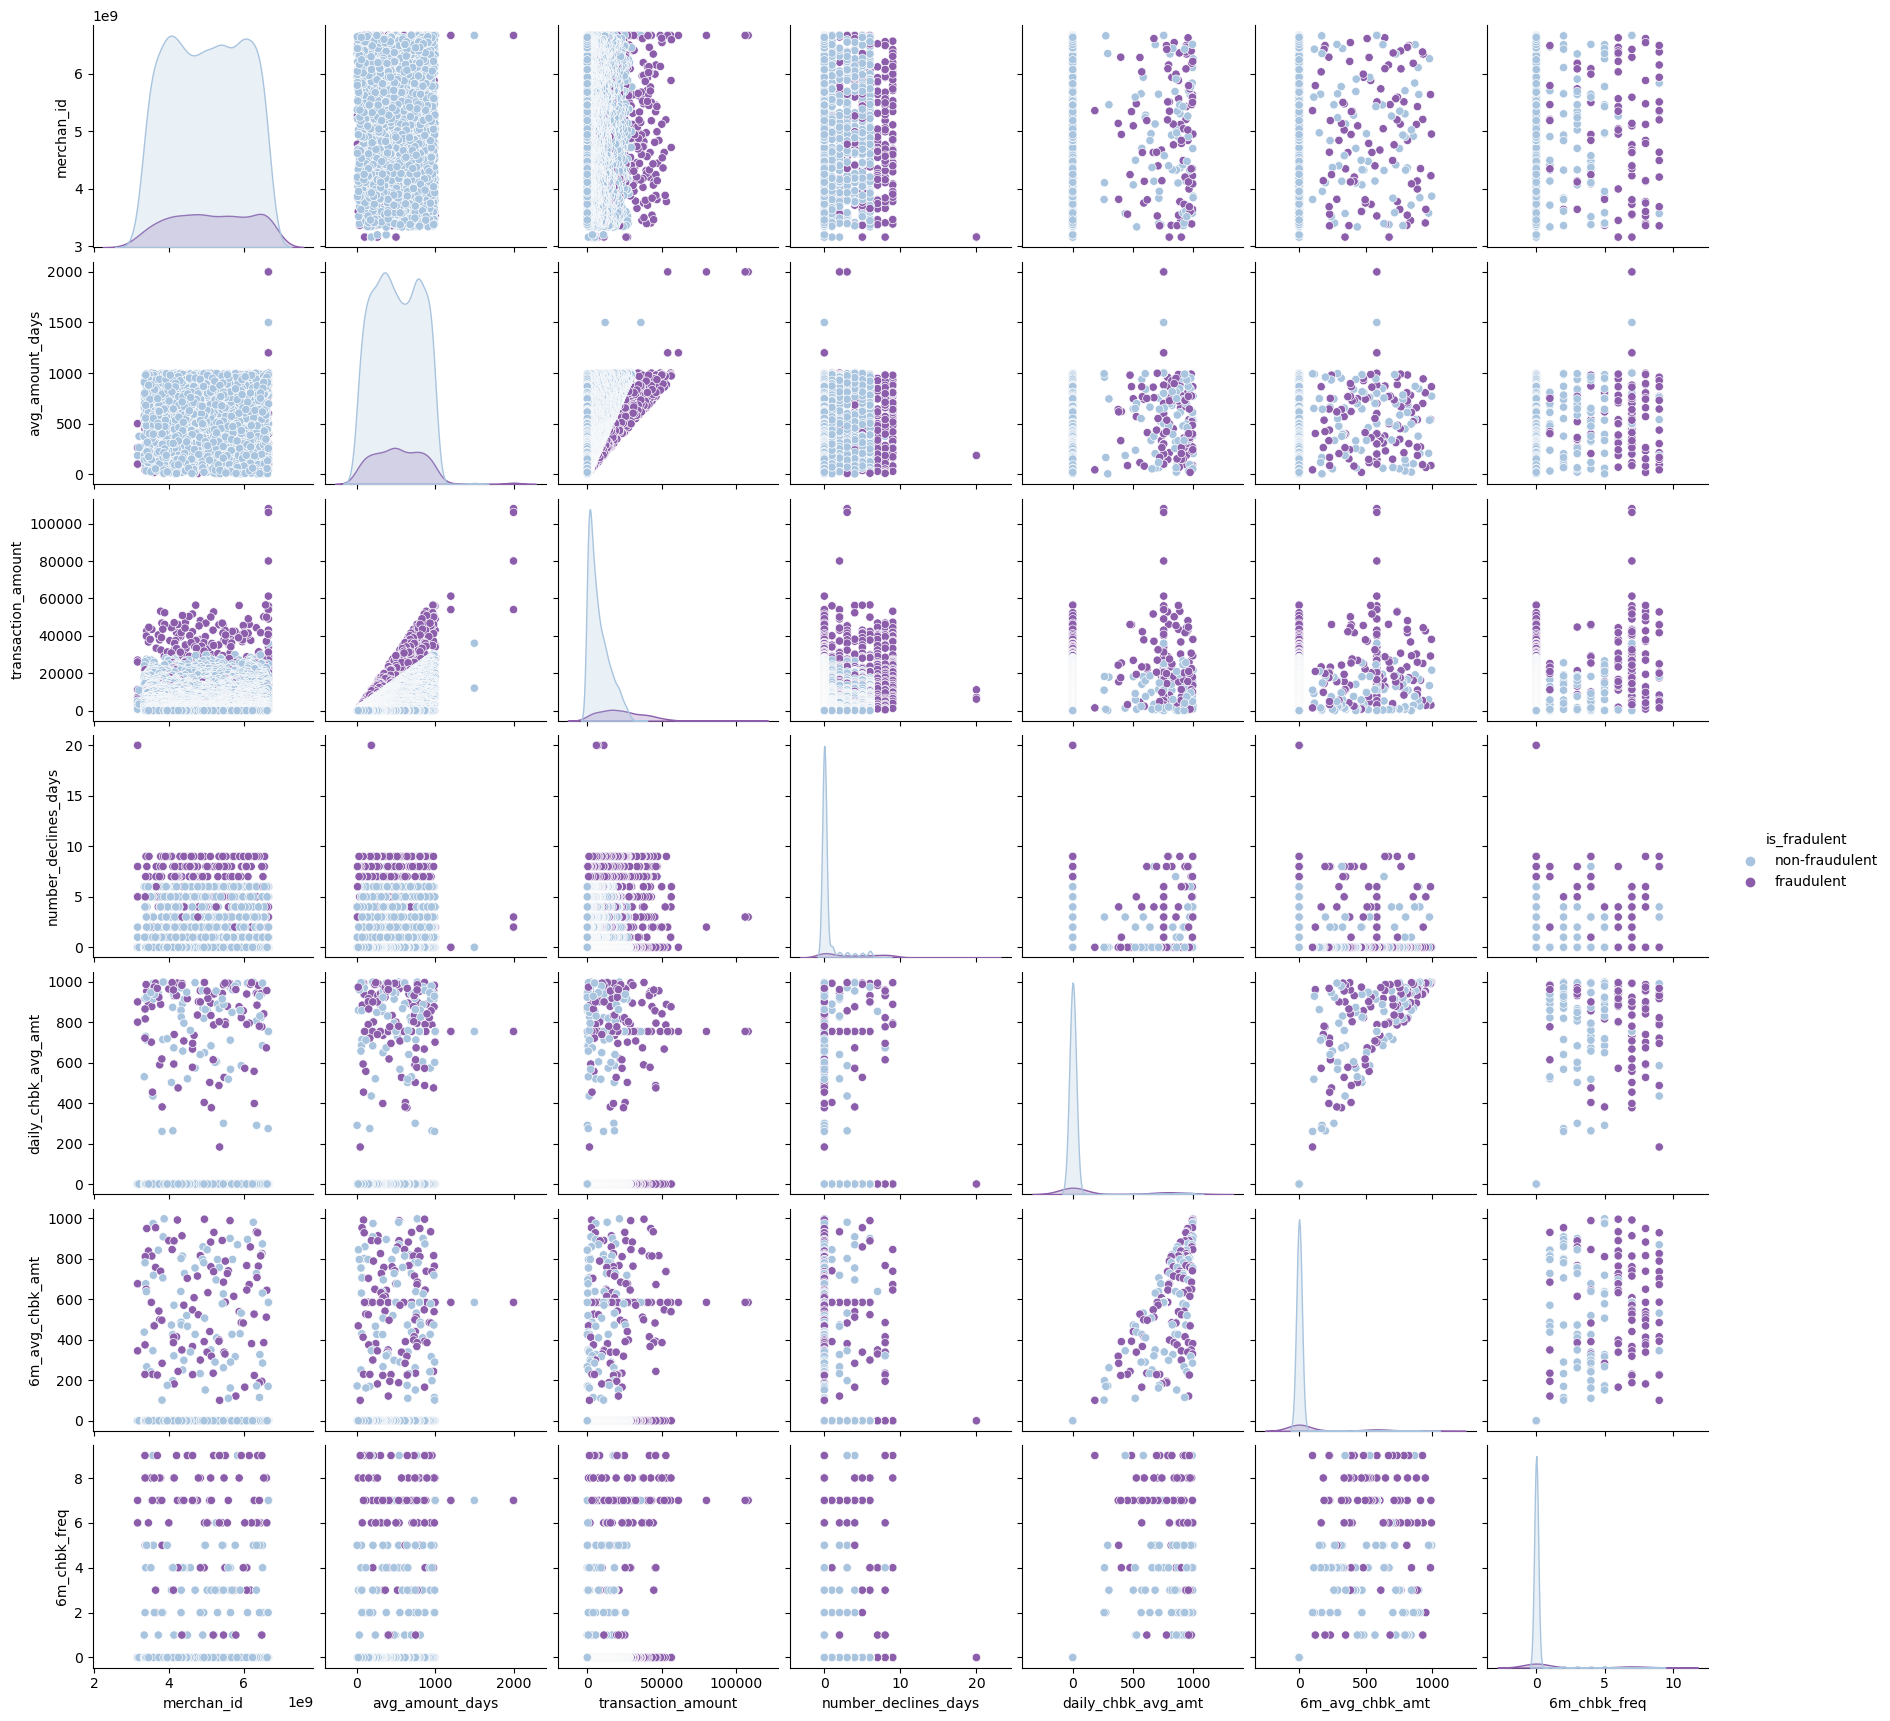

In [7]:
# pairplot

numerical_df = df[['avg_amount_days','transaction_amount','number_declines_days', 
                   'daily_chbk_avg_amt', '6m_avg_chbk_amt', '6m_chbk_freq']]
pairplot = sns.pairplot(data=df, hue="is_fradulent", palette='BuPu'); 

# fig1 = pairplot.savefig("Pairplot.png")

In [9]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(15, 10))

heatmap = sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap for Numerical Features');

# fig2 = plt.savefig('Heatmap')

In [10]:
df = pd.get_dummies(df, columns = ['is_declined', 'foreign_transaction', 'high_risk_countries', 'is_fradulent'])
df

merchan_id  avg_amount_days  transaction_amount  number_declines_days  \
0     3870243310       771.509596        21602.268700                     0   
1     4948629322       865.320280        38074.092320                     0   
2     4225126900        86.352272         2935.977252                     0   
3     5634640261       539.971341        29158.452440                     6   
4     6257110788       533.949394        13348.734850                     3   
...          ...              ...                 ...                   ...   
3070  4249959767        93.787526            0.000000                     0   
3071  6238673355        60.736688            0.000000                     0   
3072  6627351218        57.560797            0.000000                     0   
3073  3953363100        23.602436            0.000000                     0   
3074  4937713482        19.999198            0.000000                     0   

      daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq  is_declined_no  \
0                    998            998.0             5               1   
1                    996            996.0             6               1   
2                    993            992.0             7               1   
3                    991            989.0             4               1   
4                    998            981.0             5               1   
...                  ...              ...           ...             ...   
3070                   0              0.0             0               1   
3071                   0              0.0             0               1   
3072                   0              0.0             0               1   
3073                   0              0.0             0               1   
3074                   0              0.0             0               1   

      is_declined_yes  foreign_transaction_no  foreign_transaction_yes  \
0                   0                       1                        0   
1                   0                       1                        0   
2                   0                       1                        0   
3                   0                       1                        0   
4                   0                       1                        0   
...               ...                     ...                      ...   
3070                0                       0                        1   
3071                0                       0                        1   
3072                0                       1                        0   
3073                0                       1                        0   
3074                0                       1                        0   

      high_risk_countries_no  high_risk_countries_yes  \
0                          1                        0   
1                          1                        0   
2                          1                        0   
3                          1                        0   
4                          1                        0   
...                      ...                      ...   
3070                       1                        0   
3071                       1                        0   
3072                       1                        0   
3073                       1                        0   
3074                       1                        0   

      is_fradulent_fraudulent  is_fradulent_non-fraudulent  
0                           0                            1  
1                           1                            0  
2                           1                            0  
3                           1                            0  
4                           0                            1  
...                       ...                          ...  
3070                        0                            1  
3071                        0                            1  
3072                        0    

In [11]:
data = df.drop(columns=['merchan_id','is_declined_no', 'foreign_transaction_no', 'high_risk_countries_no', 'is_fradulent_non-fraudulent'], axis=1)
data

avg_amount_days  transaction_amount  number_declines_days  \
0          771.509596        21602.268700                     0   
1          865.320280        38074.092320                     0   
2           86.352272         2935.977252                     0   
3          539.971341        29158.452440                     6   
4          533.949394        13348.734850                     3   
...               ...                 ...                   ...   
3070        93.787526            0.000000                     0   
3071        60.736688            0.000000                     0   
3072        57.560797            0.000000                     0   
3073        23.602436            0.000000                     0   
3074        19.999198            0.000000                     0   

      daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq  is_declined_yes  \
0                    998            998.0             5                0   
1                    996            996.0             6                0   
2                    993            992.0             7                0   
3                    991            989.0             4                0   
4                    998            981.0             5                0   
...                  ...              ...           ...              ...   
3070                   0              0.0             0                0   
3071                   0              0.0             0                0   
3072                   0              0.0             0                0   
3073                   0              0.0             0                0   
3074                   0              0.0             0                0   

      foreign_transaction_yes  high_risk_countries_yes  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
3070                        1                        0   
3071                        1                        0   
3072                        0                        0   
3073                        0                        0   
3074                        0                        0   

      is_fradulent_fraudulent  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
3070                        0  
3071                        0  
3072                        0  
3073                        0  
3074                        0  

[3075 rows x 10 columns]

In [12]:
data = data.rename(columns={'is_declined_yes': 'is_declined', 'foreign_transaction_yes': 'foreign_transaction',
                   'high_risk_countries_yes': 'high_risk_countries', 'is_fradulent_fraudulent': 'is_fraudulent'})
data

avg_amount_days  transaction_amount  number_declines_days  \
0          771.509596        21602.268700                     0   
1          865.320280        38074.092320                     0   
2           86.352272         2935.977252                     0   
3          539.971341        29158.452440                     6   
4          533.949394        13348.734850                     3   
...               ...                 ...                   ...   
3070        93.787526            0.000000                     0   
3071        60.736688            0.000000                     0   
3072        57.560797            0.000000                     0   
3073        23.602436            0.000000                     0   
3074        19.999198            0.000000                     0   

      daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq  is_declined  \
0                    998            998.0             5            0   
1                    996            996.0             6            0   
2                    993            992.0             7            0   
3                    991            989.0             4            0   
4                    998            981.0             5            0   
...                  ...              ...           ...          ...   
3070                   0              0.0             0            0   
3071                   0              0.0             0            0   
3072                   0              0.0             0            0   
3073                   0              0.0             0            0   
3074                   0              0.0             0            0   

      foreign_transaction  high_risk_countries  is_fraudulent  
0                       0                    0              0  
1                       0                    0              1  
2                       0                    0              1  
3                       0                    0              1  
4                       0                    0              0  
...                   ...                  ...            ...  
3070                    1                    0              0  
3071                    1                    0              0  
3072                    0                    0              0  
3073                    0                    0              0  
3074                    0                    0              0  

[3075 rows x 10 columns]

In [13]:
X = data.drop('is_fraudulent', axis=1)
y = data['is_fraudulent']

In [14]:
# feature importance (Random Forest)

rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(X,y)
I = rf.feature_importances_

df2=pd.DataFrame({
    "Importance": I,
    "Feature": X.columns})
# sns.barplot(data=df2, y="Feature", x="Importance");

fig3 = px.bar(df2, x="Feature", y="Importance", title="Feature Importance using Random Forest")
fig3.show()

# fig3.write_image("Feature_Importance.png")

In [15]:
columns_names=X.columns

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
scaler = StandardScaler() 
# Fit only on X_train 
scaler.fit(X_train) 
 
# Scale both X_train and X_test 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

 
scaled_df=pd.DataFrame(X_train, columns = columns_names)

## Models

In [18]:
n = np.arange(1,11) # I want to measure training and testing accuracy for k = 0, 1, ... , 20

# define two empy arrays
atrain = np.zeros(10) # array in which we store training accuracies for different values of k   
atest  = np.zeros(10) # array in which we store testing accuracies for different values of k   
 
for i,k in enumerate(n): # first time through the loop i=0, k=1
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train,y_train) 
    atrain[i]= knn.score(X_train,y_train) 
    atest[i] = knn.score(X_test,y_test) 
     
plt.plot(n , atrain , label = 'Traing Accuracy') 
plt.plot(n , atest  , label = 'Testing Accuracy')    
plt.legend()

plt.xlabel('Number of Neighbors') 
plt.ylabel('Accuracy');

# fig4 = plt.savefig('k_vs_accuracy')

In [19]:
# define all models 
 
model1 = GaussianNB()
model2 = KNeighborsClassifier(n_neighbors=3)
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0) 
model4 = LogisticRegression(solver='newton-cg',random_state=0) 
model5 = RandomForestClassifier(n_estimators=100, random_state=0) 

In [20]:
# fit the models

model1.fit(X_train, y_train) 
model2.fit(X_train, y_train) 
model3.fit(X_train, y_train) 
model4.fit(X_train, y_train) 
model5.fit(X_train, y_train);

In [21]:
# predict class (y) for testing data (Xtest)

ypred1=model1.predict(X_test) 
ypred2=model2.predict(X_test) 
ypred3=model3.predict(X_test) 
ypred4=model4.predict(X_test) 
ypred5=model5.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, ypred1)
mse = mean_squared_error(y_test, ypred1)

error = []

for i in range(1, 30):   # i=1, 2, 3,   ..., 29
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
    
min_value = min(error)
min_index = error.index(min_value)

plt.figure(figsize=(12, 6))   
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('K Value against MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)');

# fig5 = plt.savefig('k_vs_MAE')

print("Best K value can be", min_index + 1)

Best K value can be 7


In [23]:
data

avg_amount_days  transaction_amount  number_declines_days  \
0          771.509596        21602.268700                     0   
1          865.320280        38074.092320                     0   
2           86.352272         2935.977252                     0   
3          539.971341        29158.452440                     6   
4          533.949394        13348.734850                     3   
...               ...                 ...                   ...   
3070        93.787526            0.000000                     0   
3071        60.736688            0.000000                     0   
3072        57.560797            0.000000                     0   
3073        23.602436            0.000000                     0   
3074        19.999198            0.000000                     0   

      daily_chbk_avg_amt  6m_avg_chbk_amt  6m_chbk_freq  is_declined  \
0                    998            998.0             5            0   
1                    996            996.0             6            0   
2                    993            992.0             7            0   
3                    991            989.0             4            0   
4                    998            981.0             5            0   
...                  ...              ...           ...          ...   
3070                   0              0.0             0            0   
3071                   0              0.0             0            0   
3072                   0              0.0             0            0   
3073                   0              0.0             0            0   
3074                   0              0.0             0            0   

      foreign_transaction  high_risk_countries  is_fraudulent  
0                       0                    0              0  
1                       0                    0              1  
2                       0                    0              1  
3                       0                    0              1  
4                       0                    0              0  
...                   ...                  ...            ...  
3070                    1                    0              0  
3071                    1                    0              0  
3072                    0                    0              0  
3073                    0                    0              0  
3074                    0                    0              0  

[3075 rows x 10 columns]

In [24]:
XX = data.iloc[:,[1,2]].values
yy = data['is_fraudulent'].values

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, yy, test_size=0.3, random_state=0)

In [26]:
lr = LogisticRegression(solver='newton-cg',random_state=0)

In [27]:
lr.fit(X_train1, y_train1);

In [28]:
fig8, ax = plt.subplots(figsize=(10, 10))
fig8 = plot_decision_regions(X_train1, y_train1, clf=lr, legend=2); 

plt.xlim([-1,60000])
plt.ylim([-1,12])

plt.xlabel('transaction amount')
plt.ylabel('number of declines per day')

plt.show

# fig8 = plt.savefig("DB.png")

<function matplotlib.pyplot.show(close=None, block=None)>

In [29]:
# decision tree

Columns_names= list(X.columns)
label_name = y.unique().astype('str').tolist()

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0) 
model = tree_clf.fit(X,y) 
 
dot_data = export_graphviz(tree_clf,out_file=None, 
                           feature_names=Columns_names , class_names=label_name, filled=True, rounded=True, special_characters=True)
 
graph = graphviz.Source(dot_data)
graph.render("Decision_Tree") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [30]:
## random forest tree

fn=X.columns
cn=['0','1']
fig9, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (8,4), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   max_depth = 2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# fig9 = fig.savefig('RFT.png')

In [31]:
# calculate accuracy for training data

print("Accuracy of Gaussian NB is: ", model1.score(X_train, y_train)) 
print("Accuracy of KNN is: ", model2.score(X_train, y_train))
print("Accuracy of Decision Tree is: ", model3.score(X_train, y_train)) 
print("Accuracy of  Logistic Regression is: ", model4.score(X_train, y_train)) 
print("Accuracy of Random Forest is: ", model5.score(X_train, y_train))

Accuracy of Gaussian NB is:  0.9544609665427509
Accuracy of KNN is:  0.9897769516728625
Accuracy of Decision Tree is:  0.9725836431226765
Accuracy of  Logistic Regression is:  0.9888475836431226
Accuracy of Random Forest is:  1.0


In [32]:
# calculate accuracy for testing data

print("Accuracy of Gaussian NB is: ", model1.score(X_test, y_test)) 
print("Accuracy of KNN is: ", model2.score(X_test, y_test))
print("Accuracy of Decision Tree is: ", model3.score(X_test, y_test)) 
print("Accuracy of  Logistic Regression is: ", model4.score(X_test, y_test)) 
print("Accuracy of Random Forest is: ", model5.score(X_test, y_test))

Accuracy of Gaussian NB is:  0.9642470205850487
Accuracy of KNN is:  0.9848320693391116
Accuracy of Decision Tree is:  0.9685807150595883
Accuracy of  Logistic Regression is:  0.9848320693391116
Accuracy of Random Forest is:  0.9859154929577465


In [33]:
print('Classification Report for Gaussian NB')
print(classification_report(y_test, ypred1))
print(70*'-')
print('Classification Report for KNN')
print(classification_report(y_test, ypred2))
print(70*'-')
print('Classification Report for Decision Tree')
print(classification_report(y_test, ypred3))
print(70*'-')
print('Classification Report for Logistic Regression')
print(classification_report(y_test, ypred4))
print(70*'-')
print('Classification Report for Random Forest')
print(classification_report(y_test, ypred5));

Classification Report for Gaussian NB
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       781
           1       0.88      0.89      0.88       142

    accuracy                           0.96       923
   macro avg       0.93      0.93      0.93       923
weighted avg       0.96      0.96      0.96       923

----------------------------------------------------------------------
Classification Report for KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       781
           1       0.97      0.93      0.95       142

    accuracy                           0.98       923
   macro avg       0.98      0.96      0.97       923
weighted avg       0.98      0.98      0.98       923

----------------------------------------------------------------------
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.97      1.00      0.

In [34]:
# calculate confusion matrix 
 
cm1=confusion_matrix(ypred1, y_test) 
cm2=confusion_matrix(ypred2, y_test) 
cm3=confusion_matrix(ypred3, y_test) 
cm4=confusion_matrix(ypred4, y_test) 
cm5=confusion_matrix(ypred5, y_test)

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues').set(title='CM for Gaussian NB');

# fig7 = plt.savefig('CM_GNB')

In [36]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues').set(title='CM for KNN');

In [37]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues').set(title='CM for Decision Tree');

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm4.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm4.flatten()/np.sum(cm4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm4, annot=labels, fmt='', cmap='Blues').set(title='CM for Logistic Regression');

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm5.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm5.flatten()/np.sum(cm5)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm5, annot=labels, fmt='', cmap='Blues').set(title='CM for Random Forest');

In [40]:
### plot ROC curve for Xtrain and ytrain 
 
disp=plot_roc_curve(model1, X_train, y_train) 
plot_roc_curve(model2, X_train, y_train, ax=disp.ax_) 
plot_roc_curve(model3, X_train, y_train, ax=disp.ax_) 
plot_roc_curve(model4, X_train, y_train, ax=disp.ax_) 
plot_roc_curve(model5, X_train, y_train, ax=disp.ax_) 
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.title('ROC Curve for Training Test'); 

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_p

In [41]:
### plot ROC curve for Xtest and ytest 
 
disp=plot_roc_curve(model1, X_test, y_test) 
plot_roc_curve(model2, X_test, y_test, ax=disp.ax_) 
plot_roc_curve(model3, X_test, y_test, ax=disp.ax_) 
plot_roc_curve(model4, X_test, y_test, ax=disp.ax_) 
plot_roc_curve(model5, X_test, y_test, ax=disp.ax_) 
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.title('ROC Curve for Testing Test'); 

# fig6 = plt.savefig('ROC')

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

C:\Users\iprag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_p